In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import scipy.stats as sts

Таблица Indian liver patient records.

In [2]:
# загрузим датасет

data = pd.read_csv('indian_liver_patient.csv')
data.tail(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


Описание:

*  Age - возраст пациента
*  Gender - пол пациента
*  Total_Bilirubin - общий билирубин
*  Direct_Bilirubin - прямой билирубин
*  Alkaline_Phosphotase - щелочная фосфотаза
*  Alamine_Aminotransferase - аламин аминотрансфераза
*  Aspartate_Aminotransferase - аспартат аминотрансфераза
*  Total_Protiens - всего белков
*  Albumin - альбумин
*  Albumin_and_Globulin_Ratio - соотношение альбумина и глобулина
*  Dataset - категория пациентов: есть заболевание печени - 1, здоровый пациент - 2

In [3]:
# посмотрим на данные

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [4]:
# рассчитываем коэффициент корреляции Пирсона (пропущенных данных в столбцах нет)

corr, p_value = sts.pearsonr(data['Direct_Bilirubin'], data['Total_Bilirubin'])
print(f'Коэффициент корреляции Пирсона равен {round(corr, 2)}')


Коэффициент корреляции Пирсона равен 0.87


**Два показателя - прямой билирубин и общий билирубин - достаточно сильно между собой связаны (значение корреляции Пирсона близко к 1). Поэтому можно предположить их линейную взаимосвязь и построить модель линейной регрессии. Кроме того, знак полученного коэффициента говорит о прямой зависимости показателей: при увеличении значения одного увеличивается значения другого.**

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

#### Предскажем значение показателя "общий билирубин" (целевая переменная) по показателю "прямой билирубин" (признак).

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# приведем данные к одному масштабу (для устойчивого машинного обучения)

direct = np.array(data['Direct_Bilirubin']).reshape(-1,1)
total = np.array(data['Total_Bilirubin']).reshape(-1,1)

In [7]:
# разделим данные на тренировочную и тестовую выборки (80 / 20)

X_train, X_test, y_train, y_test = train_test_split (direct, total, test_size=0.2)

In [8]:
# обучим модель

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [9]:
# рассчитаем метрики качества:
# 1) средняя абсолютная ошибка

round(mean_absolute_error(y_test, linear.predict(X_test)), 2)

0.33

In [10]:
# 2) средняя квадратичная ошибка

round(mean_squared_error(y_test, linear.predict(X_test)), 2)

0.81

In [11]:
# 3) коэффициент детерминации - функционал качества (чем ближе к 1, тем лучше модель)

round(r2_score(y_test, linear.predict(X_test)), 2)

0.97

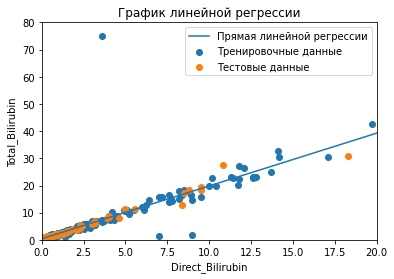

In [12]:
# построим график данных (тренировочных и тестовых) и полученную прямую линейной регрессии

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

# функция линейной регрессии: y = kx + b, где
# k = linear.coef_
# b = linear.intercept_

# создадим 70 точек для предсказаний (матрицу из 70 элементов со значениями от 0 до 80)
x = np.linspace(0, 80, 70)

y = linear.coef_ * x + linear.intercept_
y = np.transpose(y)

plt.plot(x,y)

plt.xlim(0, 20)
plt.ylim(0, 80)

plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')

plt.title('График линейной регрессии')
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])

#### По показателю "прямой билирубин" достаточно точно можно предсказать значение показателя "общий билирубин". Два параметра линейно связаны друг с другом: при повышении "прямого" повышается и "общий билирубин".

Посчитать квартили для всех **колонок**. 

In [13]:
# квартилей три: 25, 50 и 75 процентов
# расчет по вертикали (по столбцам), поэтому axis = 0

data.quantile([.25, .50, .75], axis = 0)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [14]:
# определим первую выборку - возраст до 50 лет

before_50 = data[data['Age'] < 50][['Age', 'Direct_Bilirubin']]
before_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 5 to 582
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               353 non-null    int64  
 1   Direct_Bilirubin  353 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


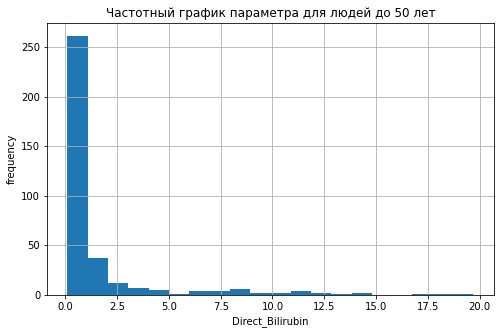

In [15]:
# построим график

plt.figure(figsize=(8, 5))
plt.hist(before_50['Direct_Bilirubin'], bins=20)

plt.xlabel('Direct_Bilirubin')
plt.ylabel('frequency')

plt.title('Частотный график параметра для людей до 50 лет')
plt.grid(True)

In [16]:
# определим вторую выборку - возраст старше 50 лет

after_50 = data[data['Age'] > 50][['Age', 'Direct_Bilirubin']]
after_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 580
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               207 non-null    int64  
 1   Direct_Bilirubin  207 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


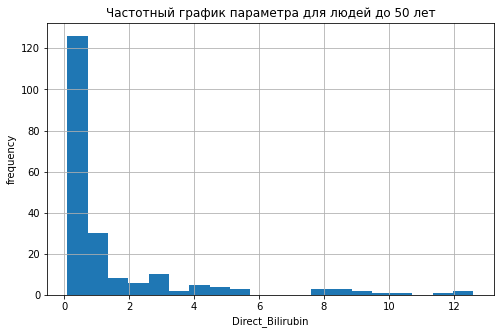

In [17]:
# построим график

plt.figure(figsize=(8, 5))
plt.hist(after_50['Direct_Bilirubin'], bins=20)

plt.xlabel('Direct_Bilirubin')
plt.ylabel('frequency')

plt.title('Частотный график параметра для людей до 50 лет')
plt.grid(True)

In [18]:
# рассчитаем средние значения двух выборок

bil_before = statistics.mean(before_50['Direct_Bilirubin'])
bil_after = statistics.mean(after_50['Direct_Bilirubin'])

print(f'Среднее значение "прямого билирубина" у людей до 50 лет равно {round(bil_before, 2)},')
print(f'у людей старше 50 лет равно {round(bil_after, 2)}.')


Среднее значение "прямого билирубина" у людей до 50 лет равно 1.49,
у людей старше 50 лет равно 1.48.


In [19]:
# квартиль 0,5 - это медиана, рассчитаем её для двух выборок

med_before = statistics.median(before_50['Direct_Bilirubin'])
med_after = statistics.median(after_50['Direct_Bilirubin'])

print(f'Медиана первой выборки (до 50 лет) равна {med_before},')
print(f'второй выборки (старше 50 лет) равна {med_after}.')


Медиана первой выборки (до 50 лет) равна 0.3,
второй выборки (старше 50 лет) равна 0.4.


#### Полученные значения средних и медианы по двум группам - до 50 и старше 50 лет - практически не отличаются: соответственно 1,49 и 1,48 - это средние значения, а 0,3 и 0,4 - это медиана (серединное значение).

#### В каждой из групп в подавляющем большинстве результат анализа на прямой билирубин остается в норме (для всех возрастов от 0 до 5). При этом в "молодой" группе есть пациенты, у которых показатель достигает значения 19, а в "зрелой" группе - только чуть больше 12.

#### Вероятнее всего, несмотря на разницу в разбросе значений, схожесть в средних показателях обусловлена количеством людей в группах: первая (до 50 лет) в 1.7 раза больше второй (люди старше 50).

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [20]:
# сформируем две выборки

tb_ill = data[data['Dataset'] == 1]['Total_Bilirubin']

tb_healthy = data[data['Dataset'] == 2]['Total_Bilirubin']

In [21]:
# рассчитаем t-критерий для первой выборки

sts.ttest_1samp(tb_ill, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746645, pvalue=0.013871861207640133)

In [22]:
# рассчитаем t-критерий для второй выборки

sts.ttest_1samp(tb_healthy, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.741265868012515, pvalue=3.1800028045329814e-64)

#### Рассчитанные значения р-value: у здоровых людей 0, у людей с больной печенью - 0,01 (две группы схожи по данному критерию).

#### Т.к. оба р-value меньше стандартного значения альфа ошибки 0,05,  нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности - отвергается. Из чего можно предположить, что генеральная совокупность и каждая из выборок (больные и здоровые люди) статистически различны между собой.

#### Т-критерий Стьюдента рассчитывается по данным, имеющим нормальное распределение. Эта проверка "на нормальность" является обязательной перед принятием решения о расчете, в частности, Т-критерия.

#### Проверка Total_Bilirubin (приведена ниже) показала, что его значения не имеют нормального распределения. Отсюда возникает сомнение в корректности проведенного расчета Т-критерия по двум выборкам из Total_Bilirubin.

In [23]:
# проверим нулевую гипотезу - данные имеют нормальное распределение (тест Шапиро-Вилка)
# примем уровень значимости 5% (или 0,05)

alpha = 0.05
stat, p = sts.shapiro(data['Total_Bilirubin'])

print('stat = %.2f, p = %.2f' % (stat, p))

if p > alpha:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat = 0.46, p = 0.00
Probably not Gaussian


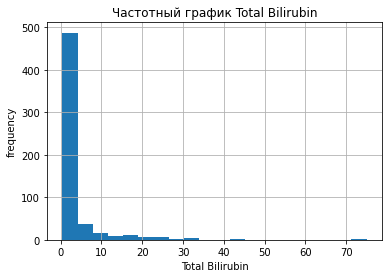

In [24]:
# график данных Total_Bilirubin

plt.figure(figsize=(6, 4))
plt.hist(data['Total_Bilirubin'], bins=20)

plt.xlabel('Total Bilirubin')
plt.ylabel('frequency')

plt.title('Частотный график Total Bilirubin')
plt.grid(True)

#### Как видно из графика, распределение данных совсем не похоже на нормальное.

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью: будут ли эти группы отличаться в дейстивельности (на ваш взгляд).

In [25]:
# сформируем три выборки

age_30 = data[data['Age'] < 30]['Dataset']

age_55 = data[(data['Age'] >= 30) & (data['Age'] < 55)]['Dataset']

age_after55 = data[data['Age'] >= 55]['Dataset']

In [26]:
# сравним три возрастные группы на наличие болезней печени

sts.f_oneway(age_30, age_55, age_after55)

F_onewayResult(statistic=9.375048806025259, pvalue=9.837730889092287e-05)

#### Рассчитанное значение p-value равно 0. Это означает, что нулевая гипотеза - у всех возрастных групп одинаковый уровень заболеваемости печени - отвергается. Здесь, однако, надо учитывать небольшую размерность выборок: до 30 лет - 105 человек, от 30 до 55 - 302 человека и старше 55 - 176 человек.

#### Расчет подтверждается реальностью: с возрастом количество и разновидность болезней только увеличиваются, в т.ч. и заболевания печени. При этом нельзя не учитывать, к примеру, рост алкогольной патологии у людей средних лет. Т.о. разные возрастные группы имеют разную степень заболевания печени.